In [259]:
import pandas as pd
import yfinance as yf
import numpy as np
import geopandas as gpd
import networkx as nx
import nltk
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo 
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen
from collections import Counter

# Data Types, Encodings and Visualization Techniques

In today's class, we will discuss various data types in the context of data science. The main points we will cover are:

- Continuous (interval and ratio) data
- Ordinal data
- Categorical data
- Temporal data
- Geographical data
- Relational data

## 1. Continuous (interval and ratio) data

Continuous data is a type of data that includes numeric values placed along a continuous scale such as time, distance, and temperature. These values are usually measured on an interval or ratio scale and can take an infinite number of possible values within a given range. 

Continuous data can be divided into interval and ratio data. Both types consist of ordered, equally, and meaningfully spaced values. The key difference between them is that ratio data has a meaningful zero point, allowing values to be added or subtracted, while interval data lacks a meaningful zero point. Examples of ratio data include revenue and sales amount, while examples of interval data are dates, pH readings, and oven temperatures.

### 1.1 Interval Data

Interval data consists of ordered values with meaningful and consistent differences between them; however, a meaningful zero point is absent. In other words, the zero value in interval data does not indicate the absence of the attribute, but rather an arbitrary point on the scale. Examples of interval data include:

- Temperature measured in Celsius or Fahrenheit (e.g., the difference between 20°C and 25°C is the same as the difference between 30°C and 35°C, but 0°C does not signify the absence of temperature)
- Calendar dates (e.g., the difference between January 1, 2000, and January 1, 2010, is the same as the difference between June 1, 2015, and June 1, 2025)

Since interval data lacks a meaningful zero point, operations like addition or subtraction can be performed, but multiplication or division are not meaningful, and ratios between the values cannot be calculated or interpreted.

### 1.2 Ratio Data

Ratio data has similar properties as interval data, with ordered values and consistent differences between them. However, unlike interval data, ratio data possesses a meaningful zero point, indicating the absence of the attribute being measured. This zero point grants the ability to perform all arithmetic operations, including multiplication and division, and to calculate ratios. Examples of ratio data include:

- Temperature measured in Kelvin (e.g., 100 K is twice as hot as 50 K, since 0 K indicates the absence of temperature)
- Distance (e.g., 10 meters is twice as far as 5 meters)
- Age (e.g., a 40-year-old individual is twice as old as a 20-year-old)

### 1.3 Analysis and Visualizations for Continuous (Interval and Ratio) Data

Analyzing continuous data typically involves calculating measures of central tendency (mean, median, mode) and dispersion (range, interquartile range, variance, standard deviation). Various visualization techniques can be employed to represent continuous data:

**Histograms**: A histogram is a bar chart that displays the frequency distribution of continuous data by dividing it into bins or intervals. Unlike bar charts used for categorical and ordinal data, histograms have no gaps between the bars, emphasizing the continuous nature of the data.

**Line charts**: Line charts are useful for depicting trends or patterns in continuous data, especially in the context of time series data (e.g., depicting the temperature trend over several days). Data points are connected by lines, illustrating the progression of values over a continuous scale.

**Box plots**: Just like for ordinal data, box plots offer a visual representation of the central tendency, dispersion, and possible outliers for continuous data. They display the median, lower quartile, upper quartile, and possible extreme values (outliers) to provide an overview of the data distribution.

**Scatterplots**: Scatterplots are two-dimensional plots displaying the relationship between two continuous variables by placing data points on a coordinate plane. This type of visualization helps reveal patterns or correlations between the variables being plotted.

### 1.4 Handling Continuous Data in Feature Engineering

Continuous data often requires some preprocessing steps, such as scaling, normalization, and transformation before being integrated into machine learning models or statistical analyses:

**Scaling**: Scaling refers to adjusting the range of continuous data, which helps deal with variables that have vastly different scales, units, or ranges. Common scaling techniques include min-max scaling and standardization (z-score normalization).

**Normalization**: It ensures that the data follows a common scale, usually ranging from 0 to 1, to improve the stability and convergence of machine learning algorithms.

**Transformation**: Applying transformations to continuous data, such as logarithmic or power transformations, can help stabilize variance, ensure normality, or convert multiplicative relationships to additive ones to meet the assumptions of certain models.

**Feature selection**: When dealing with a high number of continuous features, it may be appropriate to apply feature selection techniques, such as correlation analysis, principal component analysis (PCA), or recursive feature elimination, to identify the most relevant predictors and reduce dimensionality.

### 1.5 Examples

Let us look at an example:

In [2]:
wine = fetch_ucirepo(id=186)
wine['data']['features']

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

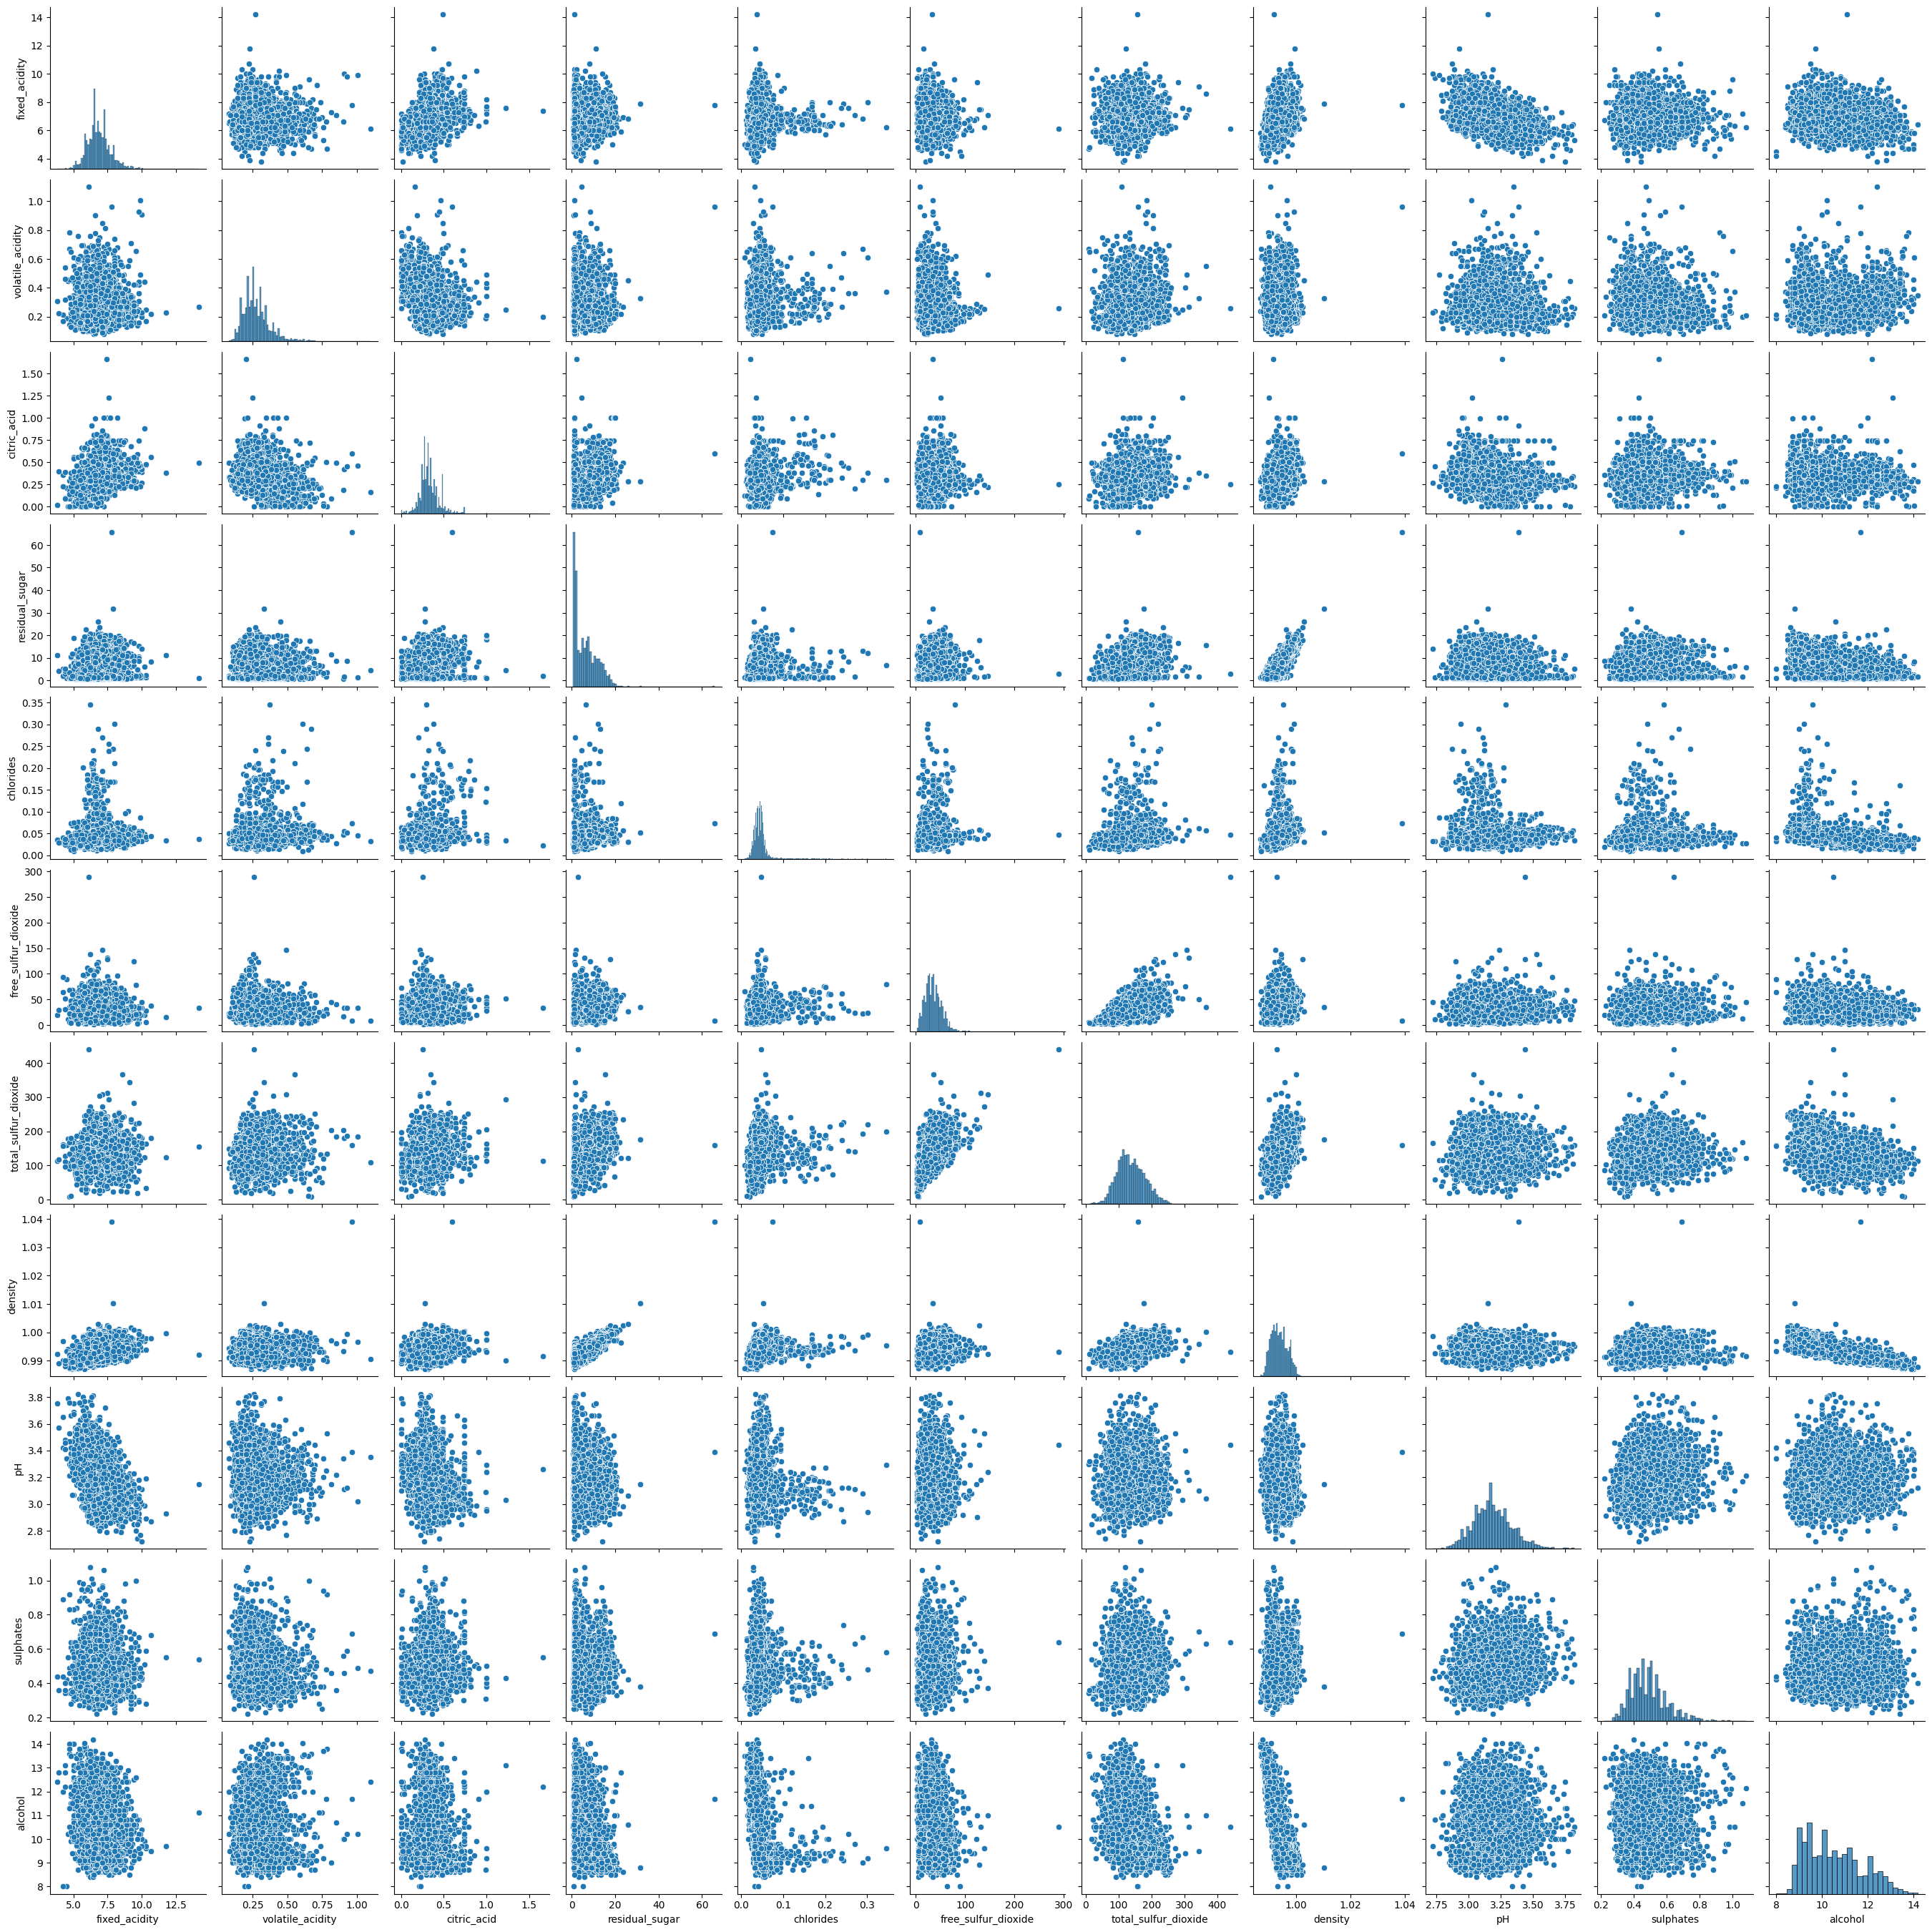

In [3]:
sns.pairplot(wine['data']['features'])

<Axes: xlabel='density', ylabel='residual_sugar'>

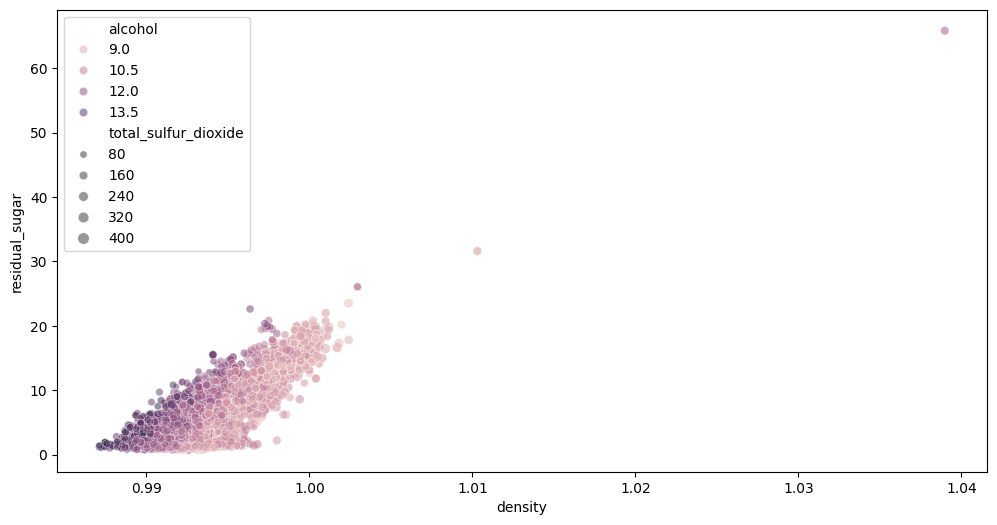

In [272]:
plt.figure(figsize=(12,6))
sns.scatterplot(y=wine['data']['features']['residual_sugar'], 
                x=wine['data']['features']['density'],
                size=wine['data']['features']['total_sulfur_dioxide'],
                hue=wine['data']['features']['alcohol'],
                alpha=0.5)

<Axes: xlabel='citric_acid', ylabel='Count'>

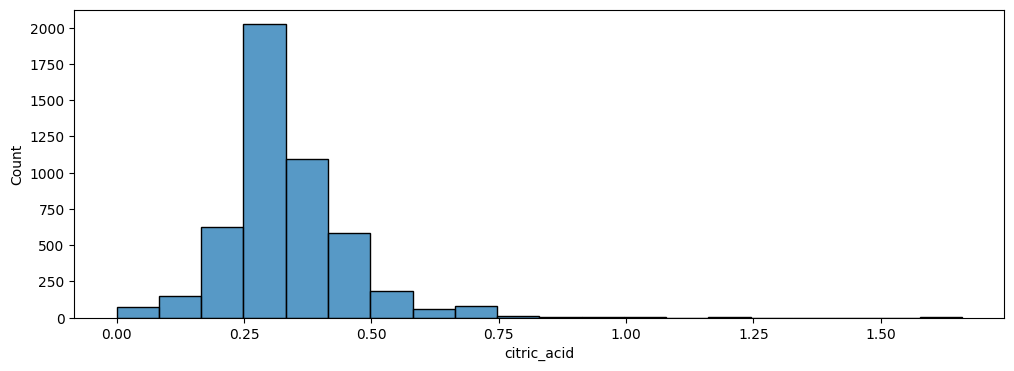

In [57]:
plt.figure(figsize=(12,4))
sns.histplot(wine['data']['features']['citric_acid'],bins=20)

<Axes: >

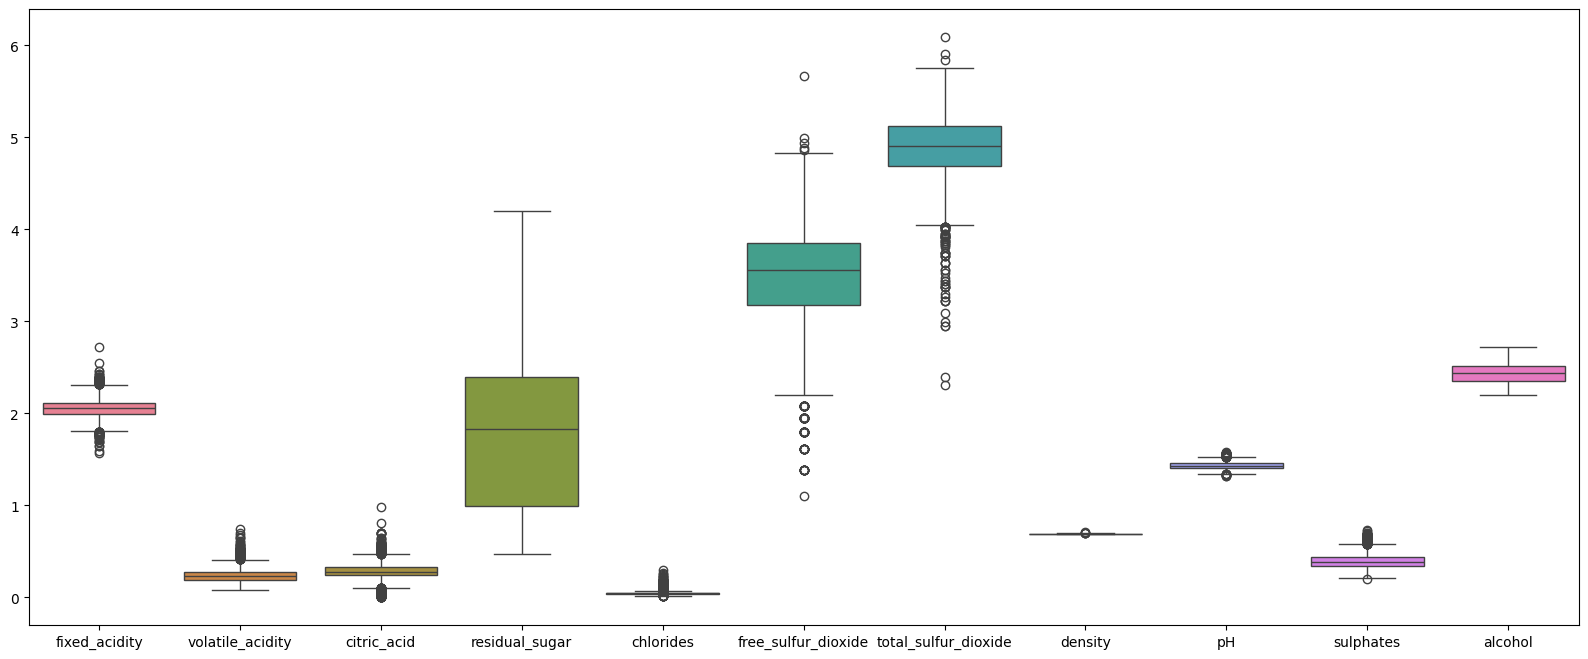

In [9]:
plt.figure(figsize=(20,8))
sns.boxplot(np.log(1+wine['data']['features']))

<Axes: >

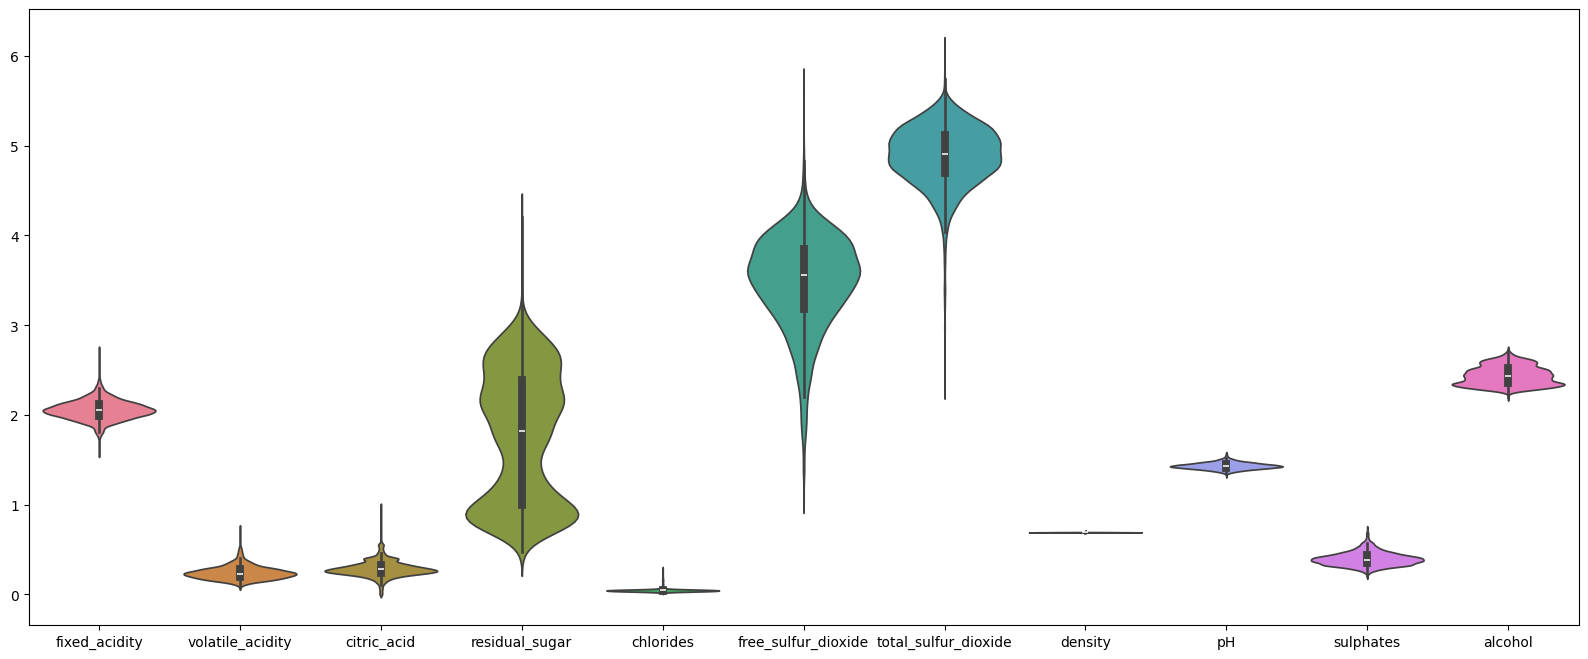

In [13]:
plt.figure(figsize=(20,8))
sns.violinplot(np.log(1+wine['data']['features']))

## 2. Ordinal data

Ordinal data is a type of data in which the values have a natural order or ranking system, but the differences between consecutive values are not necessarily meaningful or constant. These data values lie between categorical and continuous data, where they share some properties of both. Ordinal data can be represented using integers, but unlike continuous data, it does not have meaningful arithmetic operations such as addition or subtraction.

Common examples of ordinal data include:

- Likert scales (e.g., strongly agree, agree, neutral, disagree, strongly disagree)
- Education levels (e.g., high school, college, master's, Ph.D.)
- Socioeconomic status (e.g., low, middle, high)
- Survey responses (e.g., poor, fair, good, excellent)

### 2.1 Analysis and Visualizations for Ordinal Data

Analyzing ordinal data typically involves examining the frequency distribution, central tendency (such as the median or mode), and measures of dispersion (such as the range or interquartile range). Unlike continuous data, ordinal data cannot be analyzed using measures like mean or standard deviation. There are three visualization techniques commonly used for ordinal data:

**Bar charts**: Like categorical data, bar charts can also be used for ordinal data to visualize the frequency or proportion of each category. However, the order of categories should be preserved along the x-axis to represent the natural ranking of the values.

**Line charts**: Line charts can be used to visualize trends or patterns across ordinal categories, connecting data points in a ranked sequence with line segments. By preserving the order of the categories and representing the progression, line charts can convey additional insights compared to bar charts.

**Box plots**: These plots offer a visual representation of the central tendency, dispersion, and possible outliers for ordinal data. Box plots display the median, lower quartile, upper quartile, and possible extreme values (outliers) to provide an overview of the data distribution.

### 2.2 Handling Ordinal Data in Feature Engineering

When using machine learning algorithms or statistical models that require numerical input, it is important to prepare and encode ordinal data appropriately. The following techniques can be used to handle ordinal data in feature engineering:

**Integer encoding**: This method is widely used for encoding ordinal data and involves assigning integer values to categories in a way that maintains the natural order. For example, education levels like high school, college, master's, and Ph.D. can be assigned values 1, 2, 3, and 4, respectively.

**Custom encoding**: In some cases, it might be necessary to apply custom encoding based on specific domain knowledge or problem requirements. For example, you might assign weights to ordinal categories to emphasize their importance in the model.

**Binning or discretization**: Occasionally, ordinal data can be treated as continuous data by assigning interval values to categories. This process involves dividing the data into bins or intervals with equal ranges. This approach should be considered carefully, as it can lead to loss of information and the assumption of equal intervals might not be appropriate.

### 2.5 Examples

Let us look at an example:

In [27]:
cars = fetch_ucirepo(id=19) 

In [28]:
cars['data']['features']

buying  maint  doors persons lug_boot safety
0     vhigh  vhigh      2       2    small    low
1     vhigh  vhigh      2       2    small    med
2     vhigh  vhigh      2       2    small   high
3     vhigh  vhigh      2       2      med    low
4     vhigh  vhigh      2       2      med    med
...     ...    ...    ...     ...      ...    ...
1723    low    low  5more    more      med    med
1724    low    low  5more    more      med   high
1725    low    low  5more    more      big    low
1726    low    low  5more    more      big    med
1727    low    low  5more    more      big   high

[1728 rows x 6 columns]

<Axes: xlabel='count', ylabel='class'>

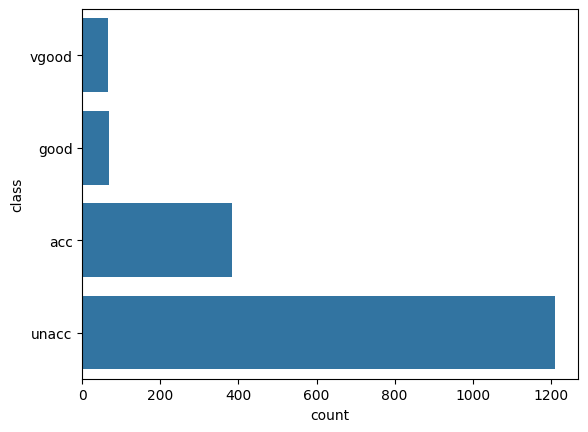

In [39]:
sns.countplot(cars['data']['targets']['class'],order=['vgood','good','acc','unacc'])

([<matplotlib.patches.Wedge at 0x7f3c576d8310>,
 [Text(-0.6472108044769336, 0.8894482416466517, 'unacc'),
  Text(0.413550280063065, -1.0193018031278867, 'acc'),
  Text(1.025931819423407, -0.3968172147155135, 'vgood'),
  Text(1.0913562359976166, -0.13762836244435522, 'good')],
 [Text(-0.35302407516923645, 0.48515358635271905, '70%'),
  Text(0.22557288003439907, -0.5559828017061199, '22%'),
  Text(0.5595991742309492, -0.2164457534811892, '4%'),
  Text(0.5952852196350635, -0.0750700158787392, '4%')])

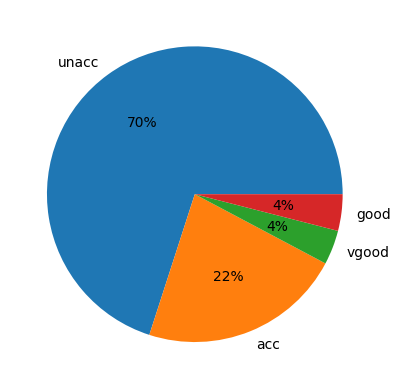

In [56]:
tmp = Counter(cars['data']['targets']['class'])
plt.pie(tmp.values(),labels=tmp.keys(),autopct='%.0f%%')

In [93]:
ct = pd.crosstab(cars['data']['features']['maint'],cars['data']['targets']['class'])
ct = ct[['unacc','acc','good','vgood']]
ct

class  unacc  acc  good  vgood
maint                         
high     314  105     0     13
low      268   92    46     26
med      268  115    23     26
vhigh    360   72     0      0

<Axes: xlabel='class', ylabel='maint'>

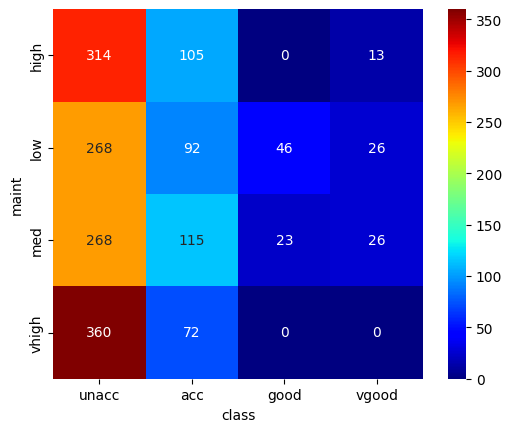

In [94]:
sns.heatmap(ct,annot=True,fmt=',.0f',square=True,cmap='jet')

<Axes: xlabel='maint'>

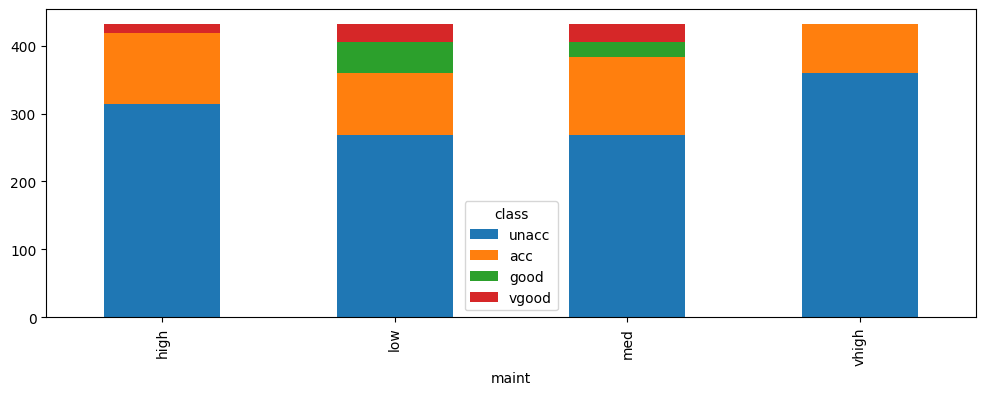

In [95]:
ct.plot(kind='bar', stacked=True, figsize=(12,4))

In [127]:
ismek = pd.read_csv('https://data.ibb.gov.tr/dataset/badd88ba-e0af-4f7d-bb7d-18dc913a7a65/resource/acc4c5d6-7654-48fb-a460-bffc6050f1b2/download/2019-2020-ismek-kesin-kaytl-kursiyer-verileri.csv',
                    encoding='iso8859-9',
                    sep=';')
ismek

Donem Egitim Durumu    Engel Durumu Calisma Durumu  \
0       2019-2020        Lisans  Engeli Olmayan        Ogrenci   
1       2019-2020          Lise  Engeli Olmayan     Calismiyor   
2       2019-2020        Lisans  Engeli Olmayan        Ogrenci   
3       2019-2020        Lisans  Engeli Olmayan        Ogrenci   
4       2019-2020        Lisans  Engeli Olmayan        Ogrenci   
...           ...           ...             ...            ...   
216760  2019-2020        Lisans  Engeli Olmayan     Calismiyor   
216761  2019-2020        Lisans  Engeli Olmayan        Ogrenci   
216762  2019-2020        Lisans  Engeli Olmayan        Ogrenci   
216763  2019-2020        Lisans  Engeli Olmayan        Ogrenci   
216764  2019-2020        Lisans  Engeli Olmayan      Calisiyor   

                            Alan                              Program  \
0                 Dil Egitimleri                Ingilizce A2 Seviyesi   
1                           Spor                      Fitness (Kadin)   
2                 Dil Egitimleri                Ingilizce A1 Seviyesi   
3                           Spor                       Crunch (Kadin)   
4                           Spor                   Stretching (Kadin)   
...                          ...                                  ...   
216760     Bilisim Teknolojileri            Powerpoint 2019 Kullanimi   
216761  Grafik Ve Teknik Tasarim     Illustrator Cizim Uygulamalari 3   
216762     Bilisim Teknolojileri  Egitimde Google Classroom Kullanimi   
216763     Bilisim Teknolojileri                 Excel 2019 Kullanimi   
216764  Grafik Ve Teknik Tasarim        3Ds Max Ile Poligon Modelleme   

       Hak Edilen Belge Tipi                 Kurs Merkezi Kurs Merkezi İlcesi  \
0                 Hak Etmedi                    Dil Okulu               Sisli   
1            Ismek Sertifika  Silivri Spor Egitim Merkezi             Silivri   
2              Meb Sertifika        Tuzla Yayla Mahallesi               Tuzla   
3                 Hak Etmedi           Atasehir Kayisdagi            Atasehir   
4                 Hak Etmedi           Atasehir Kayisdagi            Atasehir   
...                      ...                          ...                 ...   
216760            Hak Etmedi               Uzaktan Egitim             Esenler   
216761       Ismek Sertifika               Uzaktan Egitim             Esenler   
216762            Hak Etmedi               Uzaktan Egitim             Esenler   
216763            Hak Etmedi               Uzaktan Egitim             Esenler   
216764            Hak Etmedi               Uzaktan Egitim             Esenler   

                                         Tercih Sebebi      Yas Araligi  
0                 Meslek Edinmek, Meslegimde İlerlemek  20-30 Yas Arasi  
1       Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek  20-30 Yas Arasi  
2                 Meslek Edinmek, Meslegimde İlerlemek  30-40 Yas Arasi  
3       Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek      20 Yas Alti  
4       Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek      20 Yas Alti  
...                                                ...              ...  
216760                            Sosyal Cevre Edinmek  40-50 Yas Arasi  
216761            Meslek Edinmek, Meslegimde İlerlemek  20-30 Yas Arasi  
216762            Meslek Edinmek, Meslegimde İlerlemek  20-30 Yas Arasi  
216763            Meslek Edinmek, Meslegimde İlerlemek  20-30 Yas Arasi  
216764  Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek  40-50 Yas Arasi  

[216765 rows x 11 columns]

<Axes: xlabel='Calisma Durumu'>

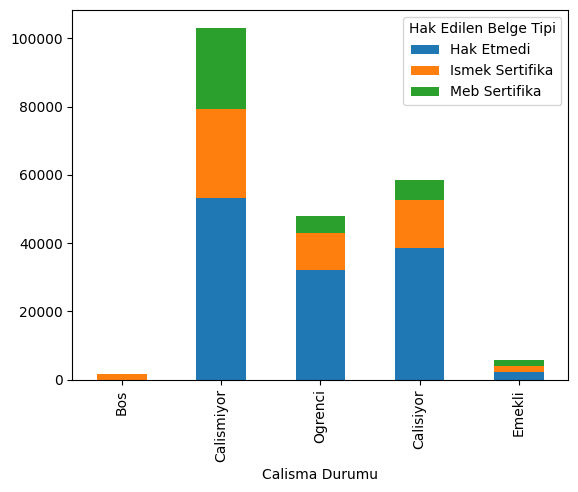

In [132]:
pd.crosstab(ismek['Hak Edilen Belge Tipi'],ismek['Calisma Durumu'])[['Bos','Calismiyor','Ogrenci','Calisiyor','Emekli']].T.plot(kind='bar',stacked=True)

<Axes: xlabel='Alan'>

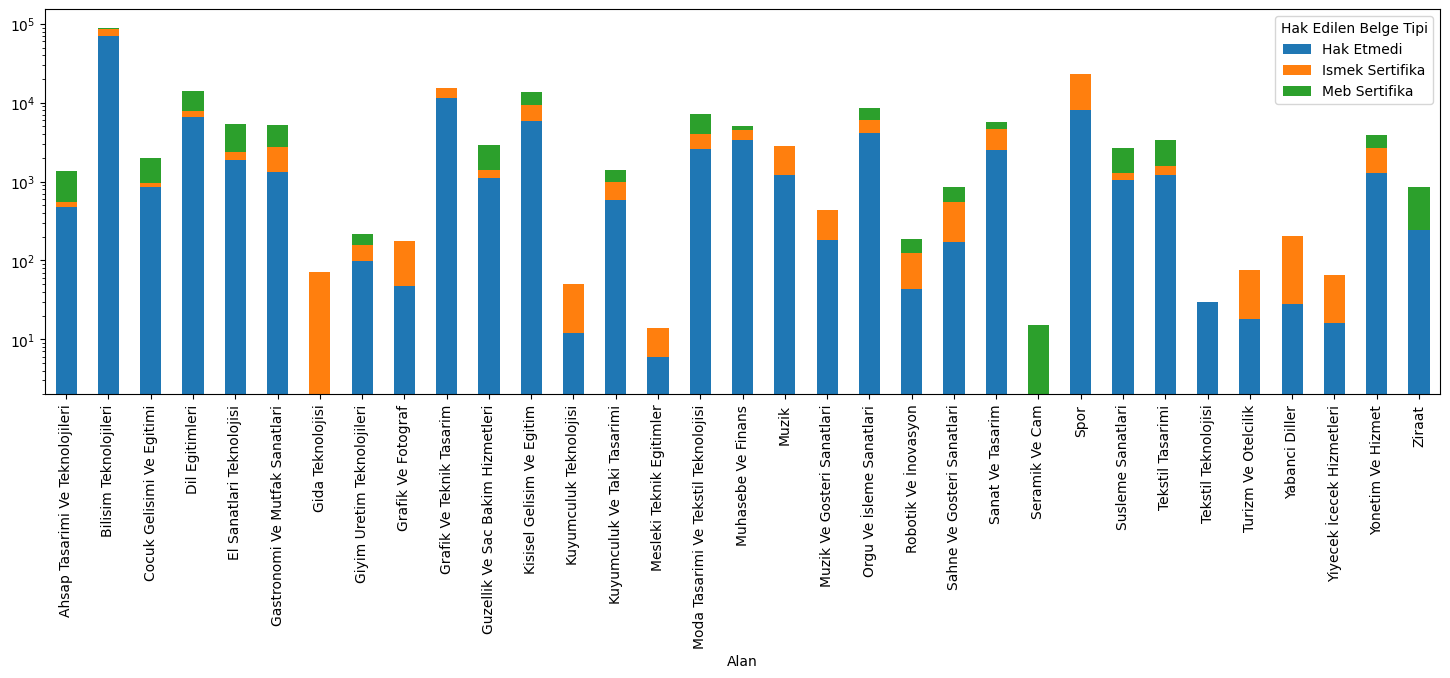

In [137]:
pd.crosstab(ismek['Alan'],ismek['Hak Edilen Belge Tipi']).plot(kind='bar',stacked=True,figsize=(18,5),logy=True)

## 3. Categorical data

Categorical data is composed of discrete values whereby each item belongs to a single category. This type of data has no inherent ordering. Knowing the cardinality, or the number of distinct values, of categorical data is important for effective data visualization.

Categorical data, also known as qualitative or nominal data, is a type of data that is non-numeric and consists of values that represent distinct categories or groups. Each observation or item falls into one and only one category. Unlike continuous or ordinal data, categorical data does not possess an inherent order or ranking. Common examples include gender (male, female), colors (red, blue, green), and countries (USA, France, Germany).

### 3.1 Primary types of categorical data:

1. **Nominal data**: This type of categorical data has no intrinsic order or ranking system. For example, in the case of colors, you cannot logically say that red comes before or after blue. Nominal data essentially consists of named categories without any meaningful numerical representation.
2. **Binary data**: Binary data is a special case of nominal data, where there are only two distinct categories. Examples of binary data include win/loss outcomes, presence/absence of a characteristic, or pass/fail results.

### 3.2 Analysis and Visualizations for Categorical Data

The analysis of categorical data typically involves understanding the frequency or proportion of each category. For instance, you might want to know the percentage of individuals who prefer a certain product or the ratio of females to males in a population sample. The most common visualization techniques for categorical data are bar charts, pie charts, and stacked bar charts.

**Bar charts**: These are useful for visualizing the frequency or proportion of each category. They represent categories on the x-axis and frequency or proportion on the y-axis.

**Pie charts**: These represent each category as a slice of a circle, with the size of the slice based on the frequency or proportion of that category. Pie charts are useful when you want to show the proportions of different categories as a whole.

**Stacked bar charts**: These are similar to bar charts but display multiple categories as segments within a single bar. Stacked bar charts can be useful when comparing multiple categorical variables.

### 3.3 Handling Categorical Data in Feature Engineering

In many machine learning algorithms and statistical models, it becomes necessary to transform categorical data into a numerical format. There are several techniques for handling categorical data in feature engineering:

1. **Label encoding**: This method involves assigning an integer value to each category within a feature. For example, you might assign 0 for "red", 1 for "blue", and 2 for "green". However, this approach assumes an ordered relationship between categories, which may not be appropriate for nominal data.
2. **One-hot encoding**: In this approach, each category is represented as a separate binary (0 or 1) variable. For instance, the colors "red", "blue", and "green" would be transformed into three separate features, with 1 representing the presence of the color and 0 representing the absence of the color.
3. **Dummy encoding**: Similar to one-hot encoding, dummy encoding represents categories in separate binary variables. However, to avoid multicollinearity issues, one category is excluded as a reference category. For instance, for colors, you might create binary variables for "red" and "blue", with the absence of both representing the "green" category. This technique is commonly used in regression models.

It is important to select the appropriate encoding method based on the nature of the categorical variable and the specific requirements of your model or algorithm. Proper handling of categorical data can significantly improve the performance of your model, enabling better insights and predictions."

### 3.4 Example

Let us look at an example:

In [139]:
cancer = fetch_ucirepo(id=15)
cancer['data']['features']

Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0                    1                            2          1.0   
1                    5                            7         10.0   
2                    1                            2          2.0   
3                    1                            3          4.0   
4                    3                            2          1.0   
..                 ...                          ...          ...   
694                  1                            3          2.0   
695                  1                            2          1.0   
696                  3                            7          3.0   
697                  4                            3          4.0   
698                  5                            4          5.0   

     Bland_chromatin  Normal_nucleoli  Mitoses  
0                  3                1        1  
1                  3                2        1  
2                  3                1        1  
3                  3                7        1  
4                  3                1        1  
..               ...              ...      ...  
694                1                1        1  
695                1                1        1  
696                8               10        2  
697               10                6        1  
698               10                4        1  

[699 rows x 9 columns]

<BarContainer object of 9 artists>

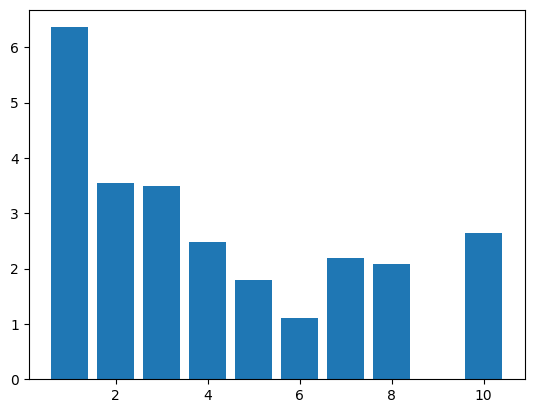

In [164]:
tmp = Counter(cancer['data']['features']['Mitoses'])
plt.bar(x=tmp.keys(),height=np.log(list(tmp.values())))

([<matplotlib.patches.Wedge at 0x7f3c4c6b0510>,
 [Text(-0.9438586758221146, 0.5649166310840251, '1'),
  Text(0.5457128713037167, -0.9550902900215525, '5'),
  Text(0.6211100392884821, -0.9078669060468392, '4'),
  Text(0.7976564572738816, -0.757459026066282, '2'),
  Text(0.9886011546324226, -0.48235646264919163, '3'),
  Text(1.061552677676566, -0.28828096107393686, '7'),
  Text(1.085633006247619, -0.17720320467124123, '10'),
  Text(1.097823182165751, -0.06916835041740084, '8'),
  Text(1.0999000115891386, -0.014831200430606255, '6')],
 [Text(-0.5148320049938806, 0.30813634422765007, '83'),
  Text(0.2976615661656636, -0.5209583400117559, '1'),
  Text(0.3387872941573538, -0.49520013057100315, '2'),
  Text(0.4350853403312081, -0.4131594687634265, '5'),
  Text(0.5392369934358668, -0.26310352508137724, '5'),
  Text(0.5790287332781269, -0.15724416058578372, '1'),
  Text(0.5921634579532465, -0.09665629345704067, '2'),
  Text(0.5988126448176823, -0.037728191136764094, '1'),
  Text(0.5999454608668

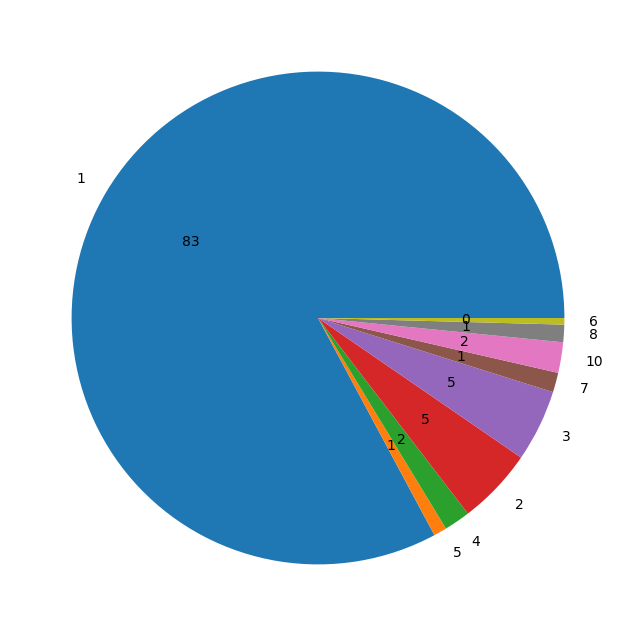

In [166]:
tmp = Counter(cancer['data']['features']['Mitoses'])
plt.figure(figsize=(8,8))
plt.pie(tmp.values(),labels=tmp.keys(),autopct='%0.f')

In [168]:
ct = pd.crosstab(cancer['data']['features']['Clump_thickness'],cancer['data']['features']['Uniformity_of_cell_shape'])
ct

Uniformity_of_cell_shape   1   2   3   4   5   6   7   8   9   10
Clump_thickness                                                  
1                         121   8  13   1   0   0   0   2   0   0
2                          42   3   2   1   0   0   1   0   0   1
3                          76  15   3   4   4   2   3   1   0   0
4                          52   9   4   5   3   3   1   3   0   0
5                          52  17  15   9   7   8   4   3   2  13
6                           8   2   6   2   2   2   5   1   0   6
7                           0   2   3   6   1   5   3   1   0   2
8                           1   0   3   9   6   3   3   7   3  11
9                           0   1   0   0   3   0   1   3   1   5
10                          1   2   7   7   8   7   9   7   1  20

<Axes: xlabel='Uniformity_of_cell_shape', ylabel='Clump_thickness'>

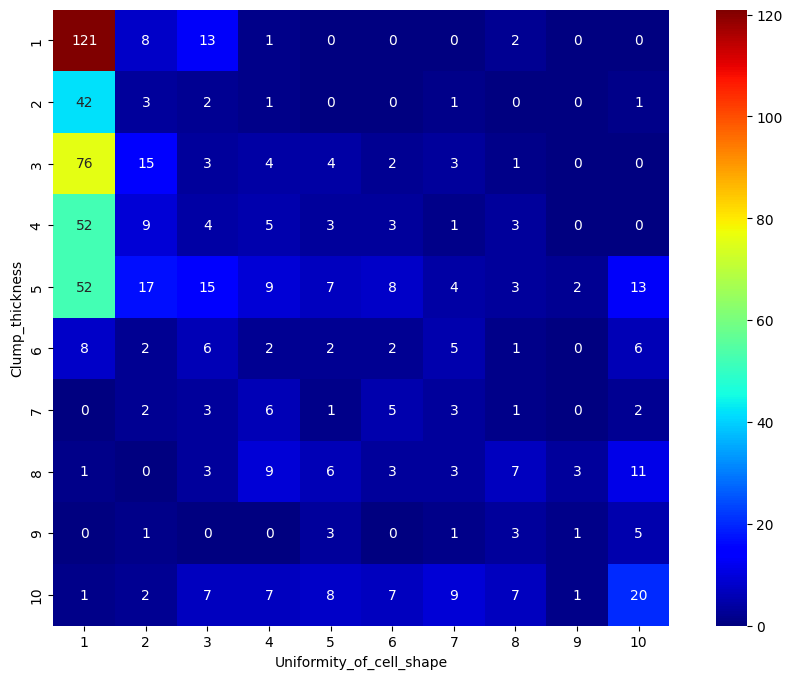

In [169]:
plt.figure(figsize=(12,8))
sns.heatmap(ct,square=True,annot=True,fmt=',.0f',cmap='jet')

<Axes: xlabel='Uniformity_of_cell_shape'>

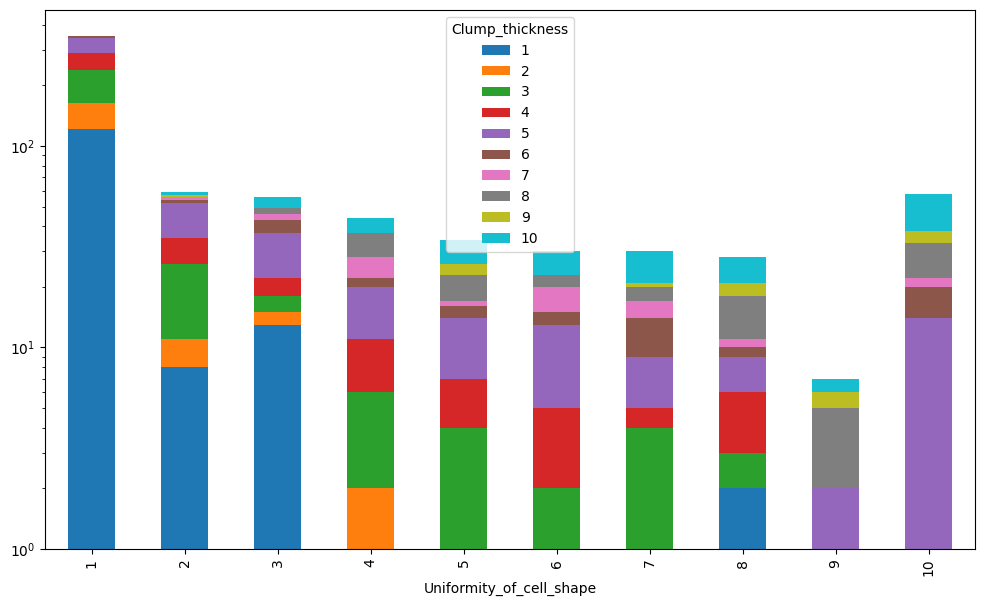

In [174]:
ct.T.plot(kind='bar',stacked=True,figsize=(12,7),logy=True)

## 4. Temporal data

Temporal data, also known as time series data, is a form of interval data with a specific time component. Each observation or value is associated with a particular timestamp, which can include dates, times, or a combination of both. Temporal data can be analyzed and visualized to reveal trends, patterns, or correlations over time.

Several aspects to consider when working with temporal data include:

- **Cyclicality**: Temporal data often contains repeated patterns or cycles over specific time periods, such as daily, weekly, or annual cycles. For example, temperatures may exhibit a daily cycle (cool mornings and warm afternoons) and an annual cycle (cool winters and warm summers).

- **Hierarchy**: Time can be organized into various hierarchical structures, such as years, quarters, months, weeks, days, hours, minutes, and seconds. Understanding how these hierarchies relate to each other allows for more comprehensive analysis and comparisons.

- **Duration**: The difference between two timestamps results in a duration, which is a form of ratio data. Durations can be added, subtracted, or compared to better understand the time elapsed between events or periods.

### 4.1 Analysis and Visualizations for Temporal Data

Analyzing temporal data involves examining trends and fluctuations over time and can include techniques such as moving averages, time-based aggregations, and time series decompositions. Below are common visualization techniques for temporal data:

- **Line charts**: Line charts are ideal for visualizing temporal data, as they display the progression of data points over time. By connecting consecutive data points through line segments, line charts can clearly display the trends and patterns in the data.

- **Heatmaps**: Heatmaps can be used to visualize temporal data in a matrix format, where rows and columns represent different units of time (e.g., hours and days, or days and months) and the color intensity indicates the value of a given metric. This visualization can highlight patterns, trends, and outliers in a more condensed form.

- **Stacked area charts**: Stacked area charts show the progression of multiple time series data as layered areas over time. By stacking the areas, they illustrate the cumulative effect of each data series and highlight trends and changes in the composition of the data over time.

- **Bar charts**: Although not as common for temporal data as line charts, bar charts can be used to visualize discrete data points or aggregated values over time intervals, such as monthly or yearly sales.

### 4.2 Handling Temporal Data in Feature Engineering

Temporal data often requires specific preprocessing and feature engineering techniques to effectively extract valuable information for machine learning models and statistical analyses:

- **Resampling**: Temporal data can be resampled to aggregate or disaggregate data points to different time intervals, such as daily, weekly, or monthly. Resampling can help capture long-term trends or focus on specific time windows.

- **Trend extraction**: Removing the trend component from temporal data can reveal patterns and fluctuations in the data that may not be apparent when considering the overall values.

- **Seasonality adjustment**: Seasonality often affects temporal data in periodic cycles, such as daily or annual patterns. Adjusting or removing seasonal effects can help uncover underlying patterns, outliers, or correlations.

- **Feature extraction**: Creating new features from time-related components, such as month, day of the week, or hour, can improve the performance of machine learning algorithms by capturing additional information about time-based patterns.

- **Handling missing values**: Temporal data may contain gaps or missing values, which can be addressed through various data imputation methods, such as linear interpolation, last observation carried forward (LOCF), or model-based imputation.

In [44]:
aapl = yf.download('AAPL')
aapl

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099450   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094261   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087343   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089504   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092099   
...                ...         ...         ...         ...         ...   
2023-10-16  176.750000  179.080002  176.509995  178.720001  178.720001   
2023-10-17  176.649994  178.419998  174.800003  177.149994  177.149994   
2023-10-18  175.580002  177.580002  175.110001  175.839996  175.839996   
2023-10-19  176.039993  177.839996  175.190002  175.460007  175.460007   
2023-10-20  175.309998  175.419998  172.639999  172.880005  172.880005   

               Volume  
Date                   
1980-12-12  469033600  
1980-12-15  175884800  
1980-12-16  105728000  
1980-12-17   86441600  
1980-12-18   73449600  
...               ...  
2023-10-16   52517000  
2023-10-17   57549400  
2023-10-18   54764400  
2023-10-19   59302900  
2023-10-20   64189300  

[10805 rows x 6 columns]

<Axes: xlabel='Date'>

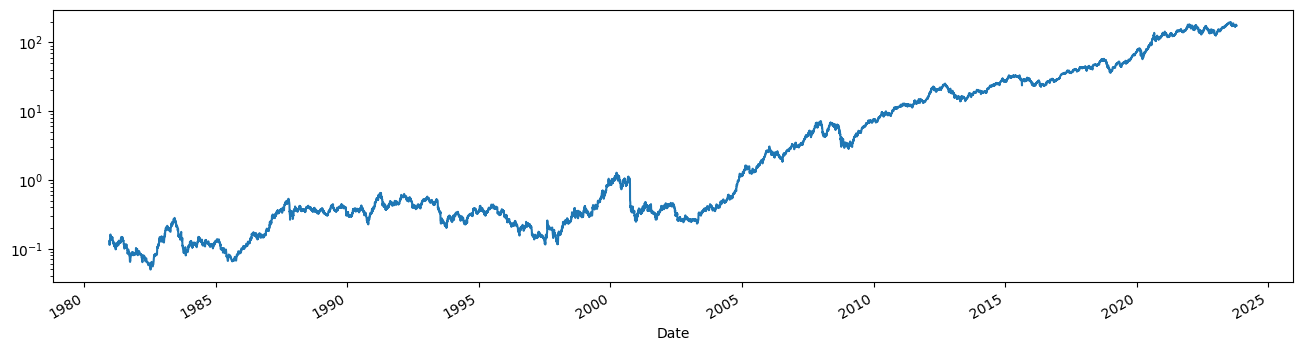

In [45]:
aapl['Open'].plot(kind='line',figsize=(16,4),logy=True)

<Axes: ylabel='Frequency'>

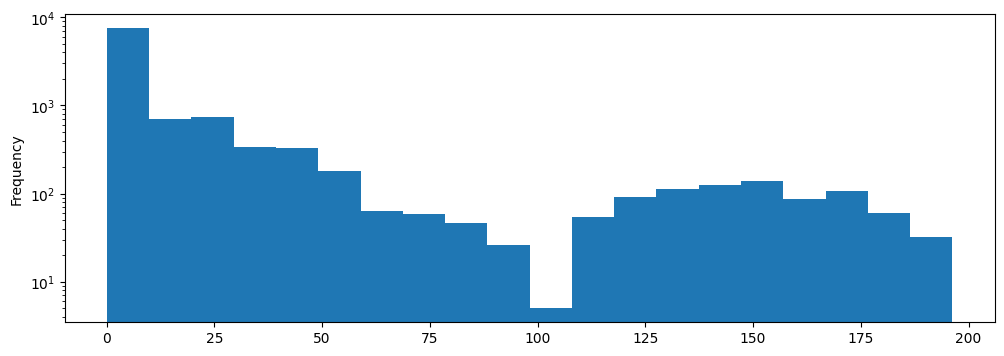

In [46]:
aapl['Open'].plot(kind='hist',log=True,bins=20,figsize=(12,4))

<Axes: >

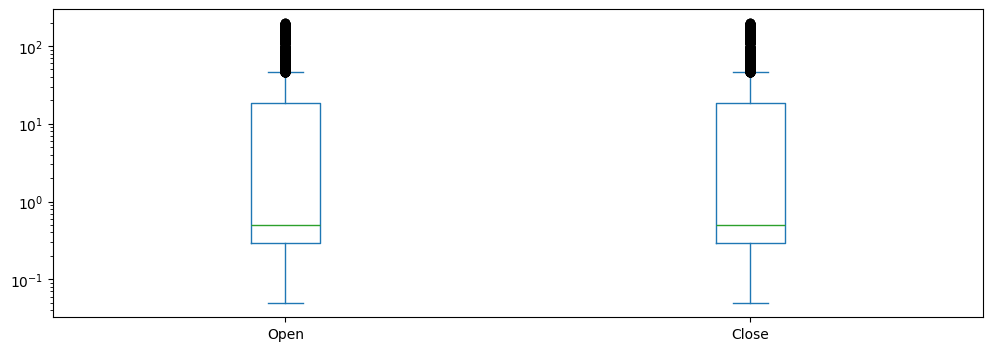

In [98]:
aapl[['Open','Close']].plot(kind='box',logy=True,figsize=(12,4))

<Axes: xlabel='Open', ylabel='Close'>

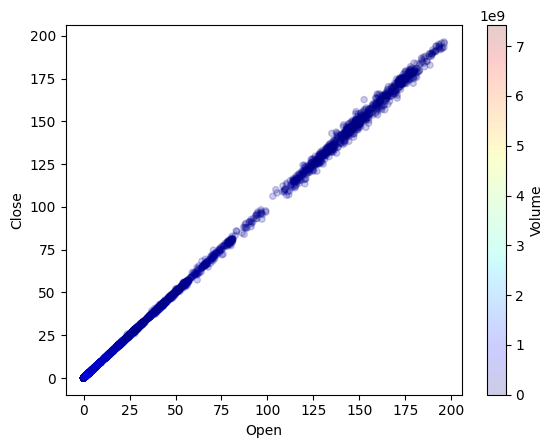

In [113]:
aapl.plot.scatter(x='Open',y='Close',c='Volume',cmap='jet',alpha=0.2)

## 5. Geographical data

Geographical data, also known as geospatial data or spatial data, refers to data that represents geographic locations, features, and attributes on the Earth's surface. Geographical data can encompass a wide range of information related to natural phenomena, human-made structures, administrative boundaries, and other objects in geographic space.

Common examples of geographical data include:

- Latitude and longitude coordinates
- Addresses (street, city, zip code, country)
- Polygon shapes of boundaries (countries, states, regions, districts)
- Elevation data
- Land use and land cover

Geographical data is usually stored and analyzed in the form of points, lines, polygons, or raster datasets. These data structures are used to represent and model various spatial relationships, such as distance, proximity, adjacency, connectivity, containment, and intersection.

### 5.1 Analysis and Visualizations for Geographical Data

Analyzing geographical data involves understanding both the spatial distribution of features and their associated attributes. A geospatial analysis may include spatial queries, distance and area calculations, buffering, and spatial join operations. The most common techniques for visualizing geographical data are maps, heat maps, and spatial charts.

**Maps**: Maps are the most straightforward representation of geographical data, displaying spatial features and their corresponding attributes in a geographic context. Examples of maps include choropleth maps, which use color gradients to represent attributes of geographic areas like population density, and point or bubble maps, which display point features with varying sizes and colors according to their attributes.

**Heat maps**: A heat map is a data visualization technique that uses color intensity to represent the density or magnitude of spatial data. Heat maps are particularly useful for visualizing point datasets with a large number of features and capturing the overall concentration and distribution of attribute values.

**Spatial charts**: These charts represent the spatial distribution of data in conjunction with other non-spatial variables, providing insights into the relationships between geographic attributes and other factors. Examples include scatterplots with geographically-defined axes, time series plots for regions, and multiline plots for comparing attribute values across various geographical areas.

### 5.2 Handling Geographical Data in Feature Engineering

Geographical data poses unique challenges and opportunities in data science applications, often requiring specialized preprocessing, encoding, and analysis techniques:

**Coordinate systems and projections**: It is essential to understand and handle the coordinate systems and map projections used in geographical data, as they influence the accuracy, scale, and distortion of spatial features and attributes. Coordinate systems, such as the Geographic Coordinate System (GCS) or the Universal Transverse Mercator (UTM), and map projections must be carefully considered and managed while processing geographical data. Transformations may be required to convert spatial data from one coordinate system to another.

**Spatial normalization**: Comparing and analyzing spatial data often require accounting for unevenly distributed or differently sized geographic units. Spatial normalization techniques, such as calculating per capita or density values, are essential to establish the comparability and context of geographic attributes.

**Spatial features and indices**: Extracting new features or indices from geographical data, such as distance and proximity metrics, landscape metrics, or centrality indices, can provide valuable insights and predictors for modeling and analysis.

**Geocoding**: Geocoding is the process of converting textual location data, such as addresses or place names, into geographic coordinates that can be mapped and analyzed in a spatial context. Likewise, reverse geocoding involves transforming geographical coordinates into location names or addresses.

**Spatial interpolation**: Spatial interpolation is a technique used to estimate or predict attribute values for geographic locations where data is not available, based on the known values and spatial relationships of neighboring observations.

**Geoprocessing**: Geoprocessing involves various analytical and data manipulation operations on spatial datasets, such as overlay, dissolving, raster calculations, and network analysis, to derive new information, insights, or spatial relationships.

In [276]:
turkey = gpd.read_file('../shared/data/geoBoundaries-TUR-ADM2.shp',encoding='utf-8')
turkey

shapeName  shapeISO                  shapeID shapeGroup shapeType  \
0       Elbeyli       NaN  54988432B86465154282957        TUR      ADM2   
1       Dodurga       NaN  54988432B84759555585504        TUR      ADM2   
2     Mahmudiye       NaN  54988432B99760089985669        TUR      ADM2   
3      Tuzlukçu       NaN  54988432B53827515712980        TUR      ADM2   
4     Sarıyahşi       NaN  54988432B79821561664997        TUR      ADM2   
..          ...       ...                      ...        ...       ...   
968     İnebolu       NaN  54988432B78813645008161        TUR      ADM2   
969        Şile       NaN  54988432B79652739540199        TUR      ADM2   
970      Seyhan       NaN  54988432B19023122389933        TUR      ADM2   
971    Çobanlar       NaN  54988432B23570910336885        TUR      ADM2   
972  İncirliova       NaN  54988432B35969765693903        TUR      ADM2   

                                              geometry  
0    POLYGON ((37.35960 36.73070, 37.36480 36.73270...  
1    POLYGON ((34.63663 40.89572, 34.65429 40.89850...  
2    POLYGON ((30.76569 39.61641, 30.77840 39.61324...  
3    POLYGON ((31.48086 38.56827, 31.53333 38.60471...  
4    POLYGON ((33.88523 39.02788, 33.89795 39.03821...  
..                                                 ...  
968  POLYGON ((33.91289 41.85428, 33.90267 41.85347...  
969  MULTIPOLYGON (((29.50179 41.03155, 29.49951 41...  
970  POLYGON ((35.32406 37.02426, 35.32362 37.02309...  
971  POLYGON ((30.94065 38.81358, 30.94119 38.80346...  
972  POLYGON ((27.78091 37.76708, 27.78020 37.76701...  

[973 rows x 6 columns]

<Axes: >

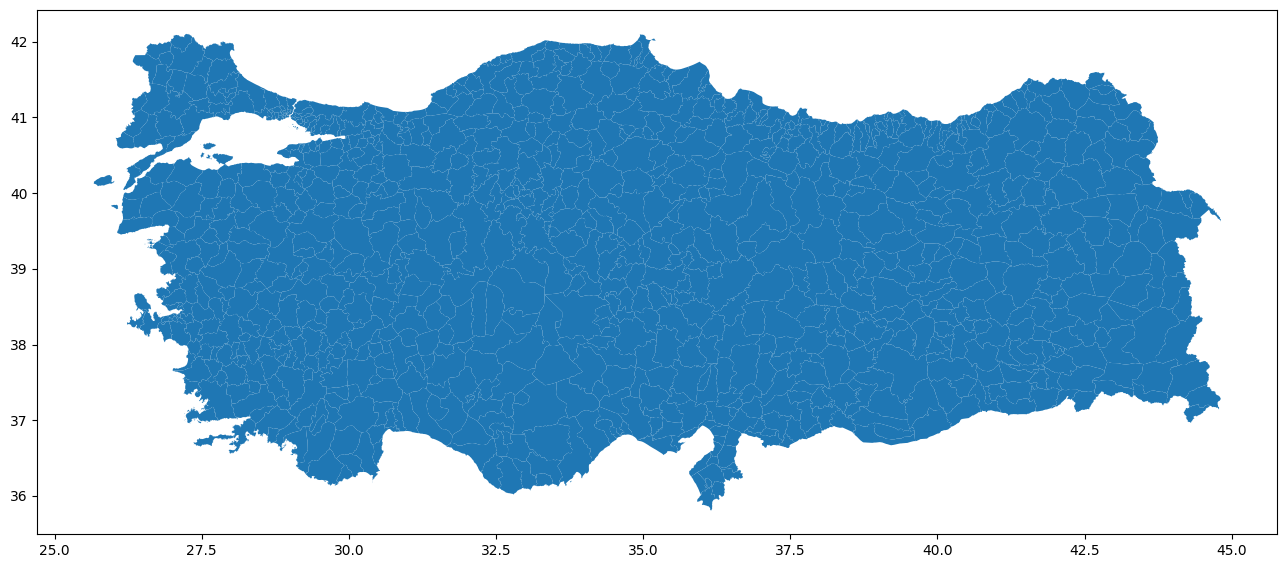

In [277]:
turkey.plot(figsize=(16,8))

In [278]:
population = pd.read_excel('../shared/data/ilce_bazli_TR_nufus.xlsx')
population

İl      İlçe  Toplam   Erkek   Kadın
0    Adana    Seyhan  807934  396728  411206
1      NaN   Yüreğir  322776  161362  161414
2      NaN    Aladağ    6674    3299    3375
3      NaN    Ceyhan  108602   54875   53727
4      NaN      Feke    4632    2393    2239
..     ...       ...     ...     ...     ...
941    NaN   Çilimli    7147    3717    3430
942    NaN   Gölyaka    8572    4388    4184
943    NaN  Gümüşova   12103    6101    6002
944    NaN  Kaynaşlı    9439    5270    4169
945    NaN   Yığılca    3728    1886    1842

[946 rows x 5 columns]

In [196]:
population.rename(columns={'İlçe': 'shapeName'},inplace=True)
data = turkey.merge(population[['shapeName','Toplam']],on='shapeName',how='right')
data

shapeName  shapeISO                  shapeID shapeGroup shapeType  \
0      Seyhan       NaN  54988432B19023122389933        TUR      ADM2   
1     Yüreğir       NaN  54988432B61783843665987        TUR      ADM2   
2      Aladağ       NaN  54988432B39717738295698        TUR      ADM2   
3      Ceyhan       NaN  54988432B85758697491434        TUR      ADM2   
4        Feke       NaN  54988432B98169837554418        TUR      ADM2   
..        ...       ...                      ...        ...       ...   
992   Çilimli       NaN  54988432B88681826210305        TUR      ADM2   
993   Gölyaka       NaN  54988432B63547038185922        TUR      ADM2   
994  Gümüşova       NaN  54988432B13153830049799        TUR      ADM2   
995  Kaynaşlı       NaN   54988432B4589751730887        TUR      ADM2   
996   Yığılca       NaN  54988432B75676722749160        TUR      ADM2   

                                              geometry  Toplam  
0    POLYGON ((35.32406 37.02426, 35.32362 37.02309...  807934  
1    POLYGON ((35.16831 36.79542, 35.17148 36.79515...  322776  
2    POLYGON ((35.10582 37.45891, 35.11148 37.47365...    6674  
3    POLYGON ((36.03544 37.21183, 36.04762 37.20753...  108602  
4    POLYGON ((35.57983 37.78969, 35.58314 37.79283...    4632  
..                                                 ...     ...  
992  POLYGON ((31.07261 40.97163, 31.07316 40.95104...    7147  
993  POLYGON ((31.01136 40.83768, 31.01240 40.83570...    8572  
994  POLYGON ((31.01926 40.85142, 31.01941 40.84781...   12103  
995  POLYGON ((31.35703 40.86002, 31.35778 40.85630...    9439  
996  POLYGON ((31.85365 41.00830, 31.85049 41.00321...    3728  

[997 rows x 7 columns]

Text(0.5, 1.0, 'Türkiye, İlçe Bazlı Nüfus')

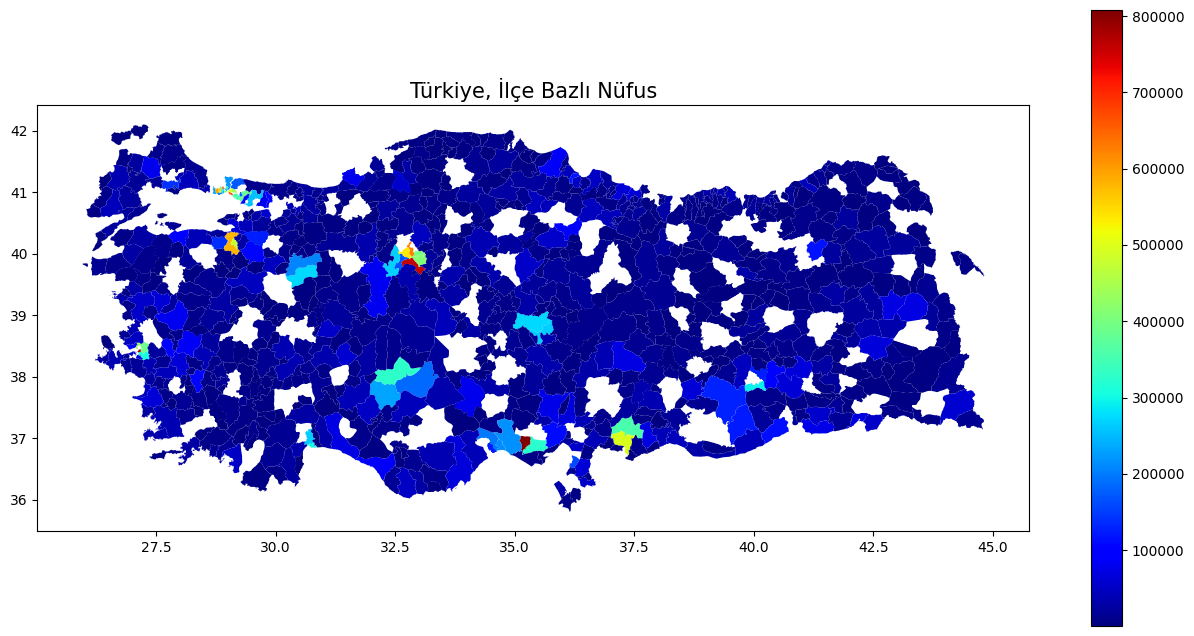

In [261]:
data.plot(column='Toplam',figsize=(16,8),cmap='jet',legend=True)
plt.title("Türkiye, İlçe Bazlı Nüfus", fontdict={"fontsize": 15}, pad=5)

In [238]:
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
unemployment = pd.read_csv(state_unemployment)

us = gpd.read_file(state_geo)
us = us.rename(columns={'name': 'NAME', 'id': 'State'})
pop = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/state/totals/NST-EST2021-alldata.csv')
geo = us.merge(pop,on='NAME').merge(unemployment,on='State')

In [246]:
geo.head()

State        NAME                                           geometry  \
0    AL     Alabama  POLYGON ((-87.35930 35.00118, -85.60667 34.984...   
1    AK      Alaska  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...   
2    AZ     Arizona  POLYGON ((-109.04250 37.00026, -109.04798 31.3...   
3    AR    Arkansas  POLYGON ((-94.47384 36.50186, -90.15254 36.496...   
4    CA  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...   

   SUMLEV REGION DIVISION  STATE  ESTIMATESBASE2020  POPESTIMATE2020  \
0      40      3        6      1            5024279          5024803   
1      40      4        9      2             733391           732441   
2      40      4        8      4            7151502          7177986   
3      40      3        7      5            3011524          3012232   
4      40      4        9      6           39538223         39499738   

   POPESTIMATE2021  ...  NETMIG2021  RESIDUAL2020  RESIDUAL2021  RBIRTH2021  \
0          5039877  ...       23380           -75           242   11.191613   
1           732673  ...       -3353            39           -54   12.667956   
2          7276316  ...       97504            -3            -6   10.584669   
3          3025891  ...       16840           -15            55   11.599962   
4         39237836  ...     -352960           858          -938   10.778412   

   RDEATH2021  RNATURALINC2021  RINTERNATIONALMIG2021  RDOMESTICMIG2021  \
0   12.890226        -1.698613               0.247201          4.398749   
1    7.700425         4.967532               0.718033         -5.295151   
2   10.469547         0.115121               0.619608         12.871739   
3   12.671819        -1.071856               0.272932          5.304960   
4    8.441637         2.336775               0.364223         -9.329701   

   RNETMIG2021  Unemployment  
0     4.645950           7.1  
1    -4.577118           6.8  
2    13.491347           8.1  
3     5.577892           7.2  
4    -8.965478          10.1  

[5 rows x 33 columns]

<Axes: >

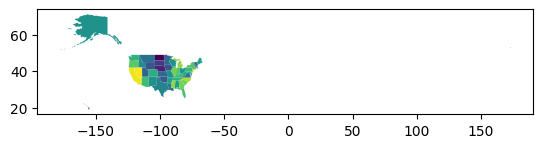

In [258]:
geo.plot(column='Unemployment')

In [247]:
continentalUS = ['Alabama', 'Arizona', 'Arkansas', 'California', 
                 'Colorado','Connecticut', 'Delaware', 'Florida', 'Georgia', 
                 'Idaho','Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
                 'Louisiana','Maine', 'Maryland', 'Massachusetts', 'Michigan',
                 'Minnesota','Mississippi', 'Missouri', 'Montana', 'Nebraska',
                 'Nevada','New Hampshire', 'New Jersey', 'New Mexico', 
                 'New York','North Carolina', 'North Dakota', 'Ohio', 
                 'Oklahoma', 'Oregon','Pennsylvania', 'Rhode Island', 
                 'South Carolina','South Dakota','Tennessee', 'Texas', 
                 'Utah', 'Vermont', 'Virginia', 'Washington','West Virginia',
                 'Wisconsin', 'Wyoming']

geo.index = geo['NAME']
continental = geo.loc[continentalUS,:]
continental.head()

State        NAME  \
NAME                           
Alabama       AL     Alabama   
Arizona       AZ     Arizona   
Arkansas      AR    Arkansas   
California    CA  California   
Colorado      CO    Colorado   

                                                     geometry  SUMLEV REGION  \
NAME                                                                           
Alabama     POLYGON ((-87.35930 35.00118, -85.60667 34.984...      40      3   
Arizona     POLYGON ((-109.04250 37.00026, -109.04798 31.3...      40      4   
Arkansas    POLYGON ((-94.47384 36.50186, -90.15254 36.496...      40      3   
California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...      40      4   
Colorado    POLYGON ((-107.91973 41.00391, -105.72895 40.9...      40      4   

           DIVISION  STATE  ESTIMATESBASE2020  POPESTIMATE2020  \
NAME                                                             
Alabama           6      1            5024279          5024803   
Arizona           8      4            7151502          7177986   
Arkansas          7      5            3011524          3012232   
California        9      6           39538223         39499738   
Colorado          8      8            5773714          5784308   

            POPESTIMATE2021  ...  NETMIG2021  RESIDUAL2020  RESIDUAL2021  \
NAME                         ...                                           
Alabama             5039877  ...       23380           -75           242   
Arizona             7276316  ...       97504            -3            -6   
Arkansas            3025891  ...       16840           -15            55   
California         39237836  ...     -352960           858          -938   
Colorado            5812069  ...       14731           168           343   

            RBIRTH2021  RDEATH2021  RNATURALINC2021  RINTERNATIONALMIG2021  \
NAME                                                                         
Alabama      11.191613   12.890226        -1.698613               0.247201   
Arizona      10.584669   10.469547         0.115121               0.619608   
Arkansas     11.599962   12.671819        -1.071856               0.272932   
California   10.778412    8.441637         2.336775               0.364223   
Colorado     10.464475    8.276378         2.188097               0.289228   

            RDOMESTICMIG2021  RNETMIG2021  Unemployment  
NAME                                                     
Alabama             4.398749     4.645950           7.1  
Arizona            12.871739    13.491347           8.1  
Arkansas            5.304960     5.577892           7.2  
California         -9.329701    -8.965478          10.1  
Colorado            2.251393     2.540621           7.7  

[5 rows x 33 columns]

Text(0.5, 1.0, 'US Unemployment')

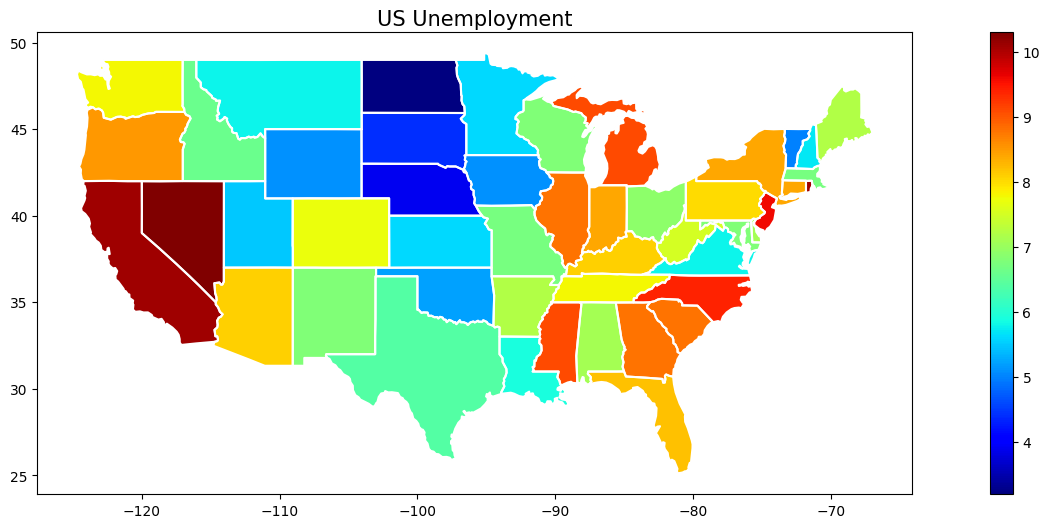

In [248]:
ax = continental.boundary.plot(figsize=(20, 6),color='white')
continental.plot(ax=ax, column='Unemployment', cmap='jet', legend=True)
plt.title("US Unemployment", fontdict={"fontsize": 15}, pad=5)

## 6. Relational data

Relational data is a type of data that connects or establishes relationships between two or more data points or entities. This type of data is particularly important when examining connections within a hierarchy or a network. Relational data can represent connections that are quantitative (such as distances or similarity scores) or qualitative (such as hierarchical relationships or social connections). Examples of relational data include:

- Social network connections between people (e.g., friends, followers, or connections)
- Hierarchical relationships in an organization (e.g., reports-to relationships between employees)
- Connections in citation networks between research papers (e.g., instances in which one paper cites another)

### 6.1 Representing and Storing Relational Data

Relational data can be represented and stored in various formats, such as:

1. **Adjacency matrix**: An adjacency matrix is a square matrix that represents connections between entities in a network or a graph. The rows and columns correspond to the entities, and the value in each cell represents the relationship between them (e.g., 1 if there's a connection and 0 if not, or a numeric value denoting the strength of the connection).

2. **Edge list**: An edge list is a list of tuples, where each tuple represents a connection between two entities. For example, a tuple (A, B) would represent a connection between entity A and entity B.

3. **Data tables**: Relational databases store data as tables, using keys to establish and represent relationships between entities. Foreign keys from one table reference primary keys in another table to form connections between related records.

### 6.2 Analysis and Visualizations for Relational Data

Analyzing relational data generally involves examining the connections between entities, investigating structural properties of the network, and identifying influential entities or groups. Common visualization techniques for relational data include:

**Network graphs**: Network graphs (or node-link diagrams) are a visual representation of relational data, where entities are depicted as nodes (or vertices) and connections are represented by edges (or links) between these nodes. Network graphs can be used to visualize relationships, examine the structure of the network, and identify clusters or influential entities.

**Matrix visualizations**: Matrix visualizations display relational data in an adjacency matrix format, typically using color to represent the strength of connections between entities. Reordering rows and columns can help identify clusters and patterns in the data.

**Hierarchical visualizations**: Tree diagrams or dendrograms can be employed to represent hierarchical relational data, where entities are represented as nodes and connections signify parent-child relationships. These visualizations help to understand the structure of the hierarchy and the depth of relationships between entities.

### 6.3 Handling Relational Data in Feature Engineering

Working with relational data in machine learning algorithms and statistical models often requires transforming the data into a suitable format for analysis. Some techniques for handling relational data in feature engineering include:

**Node features**: Extracting features based on the properties or attributes of individual nodes, such as the degree (number of connections), betweenness centrality (a measure of how important a node is in connecting other nodes), or clustering coefficient (a measure of how connected a node's neighbors are).

**Edge features**: Extracting features from edges based on their attributes or properties, such as edge weights, types of relationships, or similarity measures between connected nodes.

**Aggregated features**: Computing aggregated features based on the neighborhood of a node or a group of nodes. For instance, calculating the average degree of a node's neighbors, or the proportion of nodes within a group that belong to a certain category.

**Graph representation learning**: Applying techniques such as graph embeddings or graph neural networks to learn low-dimensional vector representations of nodes in the network that capture structural information and relationships. These learned representations can then be used as features in machine learning models.


## Game of Thrones Characters

The data is taken from [here](https://github.com/mathbeveridge/asoiaf/).

In [201]:
got = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv')
got.rename(columns={'Source':'source', 'Target':'target'},inplace=True)
got.query('weight>10')

source                        target  \
3                       Addam-Marbrand               Jaime-Lannister   
16                   Aegon-I-Targaryen            Daenerys-Targaryen   
25    Aegon-Targaryen-(son-of-Rhaegar)            Daenerys-Targaryen   
28    Aegon-Targaryen-(son-of-Rhaegar)                        Haldon   
30    Aegon-Targaryen-(son-of-Rhaegar)                Jon-Connington   
...                                ...                           ...   
2809                  Tyrion-Lannister                        Ysilla   
2812                   Tywin-Lannister                   Walder-Frey   
2817       Walder-Frey-(son-of-Jammos)  Walder-Frey-(son-of-Merrett)   
2819                      Waymar-Royce               Will-(prologue)   
2822                            Yandry                        Ysilla   

            Type    id  weight  
3     Undirected     3      14  
16    Undirected    16      13  
25    Undirected    25      11  
28    Undirected    28      14  
30    Undirected    30      16  
...          ...   ...     ...  
2809  Undirected  2809      11  
2812  Undirected  2812      12  
2817  Undirected  2817      15  
2819  Undirected  2819      18  
2822  Undirected  2822      14  

[729 rows x 5 columns]

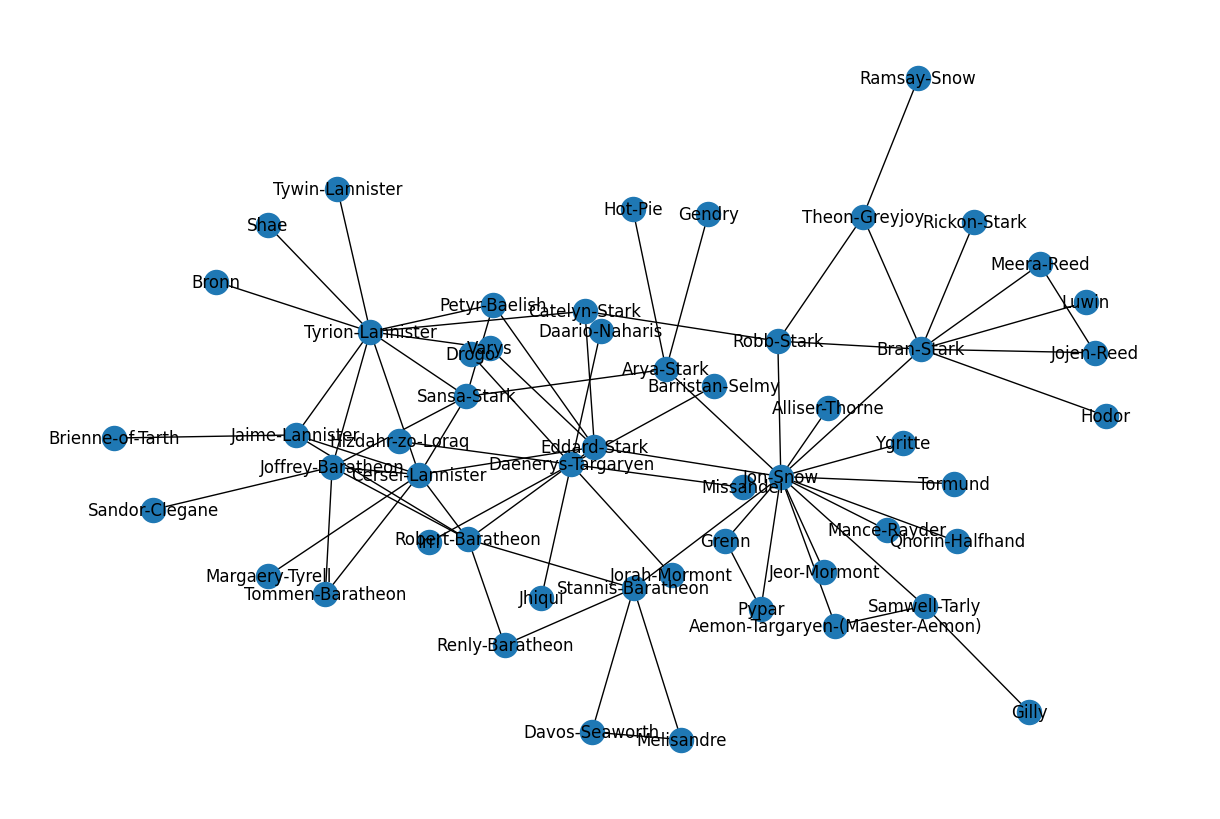

In [210]:
G = nx.from_pandas_edgelist(got[['source','target','weight']].query('weight>60'))
plt.figure(figsize=(12,8))
nx.draw_kamada_kawai(G,with_labels=True)

In [212]:
[k for k,v in nx.pagerank(G).items() if v>0.02]

['Jon-Snow',
 'Samwell-Tarly',
 'Arya-Stark',
 'Sansa-Stark',
 'Daenerys-Targaryen',
 'Bran-Stark',
 'Robb-Stark',
 'Theon-Greyjoy',
 'Jaime-Lannister',
 'Tyrion-Lannister',
 'Eddard-Stark',
 'Cersei-Lannister',
 'Joffrey-Baratheon',
 'Robert-Baratheon',
 'Stannis-Baratheon']

## Huckleberry Finn



In [217]:
with urlopen('https://www.gutenberg.org/files/76/76-0.txt') as url:
    finn = url.read()[9762:591195]

In [221]:
sentences = nltk.sent_tokenize(finn.decode('utf-8'))
edges = []
for sentence in sentences:
    tagged_sentence = nltk.pos_tag(nltk.word_tokenize(sentence))
    names = []
    for chunk in nltk.ne_chunk(tagged_sentence):
        if hasattr(chunk, 'label') and chunk.label()=='PERSON':
            name = ' '.join([c[0] for c in chunk])
            names.append(name.lower())
    if len(names)>1:
        tmp = list(set(names))
        edges.extend(list(itertools.combinations(tmp, 2)))

In [223]:
weights = Counter(edges)
source = []
target = []
weight = []
for (x,y),w in weights.items():
    if w>1:
        source.append(x)
        target.append(y)
        weight.append(w)

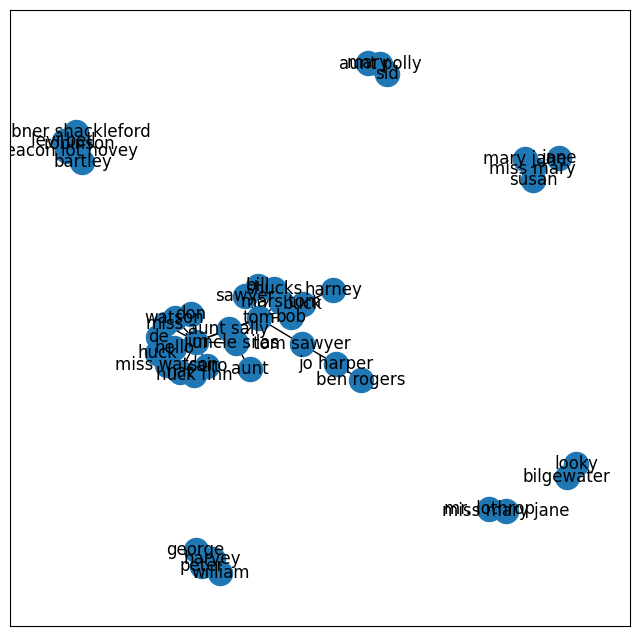

In [237]:
G = nx.from_pandas_edgelist(pd.DataFrame({'source': source, 'target': target, 'weight': weight}))
plt.figure(figsize=(8,8))
nx.draw_networkx(G,with_labels=True)

In [262]:
[k for k,v in nx.pagerank(G).items() if v>0.02]

['mary',
 'jim',
 'tom',
 'jo harper',
 'tom sawyer',
 'buck',
 'looky',
 'bilgewater',
 'peter',
 'harvey',
 'susan',
 'mary jane',
 'robinson',
 'levi bell',
 'deacon lot hovey',
 'mr. lothrop',
 'miss mary jane',
 'jane',
 'miss mary',
 'aunt sally',
 'uncle silas']